# Scz 数据脑区动态变化

In [1]:
import h5py
import numpy as np
from numpy import *
import pandas as pd

In [2]:
#读取mat文件
fmri = h5py.File("/Users/eugene_zh/学术/ITSBI/研究生/研一/课题/scz_Data/aal2_266.mat",'r+')               
fmri

<HDF5 file "aal2_266.mat" (mode r+)>

In [3]:
print(fmri.keys())
print(fmri.values())

<KeysViewHDF5 ['#refs#', 'aal2_266']>
ValuesViewHDF5(<HDF5 file "aal2_266.mat" (mode r+)>)


In [4]:
data = fmri["aal2_266"]

计算FC

In [6]:
# 全窗口计算静态FC
fclist=[]
for i in range(0,266):
    df = pd.DataFrame(fmri[data[i][0]],).T
    fcm = df.corr()
    indices = np.triu_indices_from(fcm.values,1)
    fc = np.asarray(fcm.values[indices])
    fclist.append(fc)

In [ ]:
len(fclist[1])

In [ ]:
# 一个被试的数据 行为时间点 列为脑区
pd.DataFrame(fmri[data[265][0]]).T

In [ ]:
# 试计算一个被试的动态变化
v_266 = fc_var_all(pd.DataFrame(fmri[data[0][0]]).T,10)

In [68]:
# 计算所有人的动态脑区变化

var_266=[]

for i in range(0,266):
    var_266.append(fc_var_all(pd.DataFrame(fmri[data[i][0]]).T,10))

In [65]:
# 计算所有人的动态脑区变化

var_266=[]

for i in range(0,266):
    var_266.append(fc_var_all(pd.DataFrame(fmri[data[i][0]]).T,10))

In [59]:
sz_avg = pd.DataFrame(var_266).mean()

In [78]:
sz_avg.to_csv('sz_dFC_all.csv')

In [80]:
hc_avg.to_csv('hc_dFC_all.csv')

In [69]:
# 分患病组和健康组
scz_var = var_266[0:154]
hc_var = var_266[154:]

In [70]:
#转为Dataframe
sz_v = pd.DataFrame(scz_var)
hc_v = pd.DataFrame(hc_var)

sz_avg = sz_v.mean()
hc_avg = hc_v.mean()

In [71]:
sz_avg = sz_v.mean()
hc_avg = hc_v.mean()

In [79]:
# 精分患者平均可变性降序排列
sz_avg.sort_values(ascending=False)

92    0.865766
81    0.863991
93    0.860757
80    0.860617
74    0.857861
        ...   
13    0.773865
12    0.773381
49    0.766994
53    0.765834
52    0.758019
Length: 94, dtype: float64

**对于精分患者来说，脑区的变化性排名前五的是：（索引从0开始，括号内为脑区编号）**

* 74（75）-- NCL（Caudate_L）尾状核左
* 75（76）-- NCR（Caudate_R）尾状核右
* 81（82）-- THAR（Thalamus_R）丘脑右
* 42（43）-- PARA_HIPPOL（ParaHippocampal_L）海马旁回左
* 92（93）-- T3L（Temporal_Inf_L）颞下回左

**排序后五为：**

* 50（51）-- LINGL（Lingual_L）舌回左
* 12（13）-- ORL（Rolandic_Oper_L）中央沟盖左
* 53（54）-- O1R（Occipital_Sup_R）枕上回右
* 13（14）-- ORR（Rolandic_Oper_R）中央沟盖右
* 52（53）-- O1L（Occipital_Sup_L）枕上回左

In [ ]:
# 健康患者平均可变性降序排列
hc_avg.sort_values(ascending=False)

**对于正常对照组来说，脑区的变化性排名前五的是：（索引从0开始，括号内为脑区编号）**

* 26（27）-- OFCant_L（OFCANTL）orbitofrontal cortex?前眶额皮层前部
* 80（81）-- THAL（Thalamus_L）丘脑左
* 74（75）-- NCL（Caudate_L）尾状核左
* 16（17）-- COBL（Olfactory_L）嗅皮质左
* 75（76）-- NCR（Caudate_R）尾状核右

**排序后五为：**

* 12（13）-- ORL（Rolandic_Oper_L）中央沟盖左
* 50（51）-- LINGL（Lingual_L）舌回左
* 49（50）-- QR（Cuneus_R）楔叶右
* 51（52）-- LINGR（Lingual_R）舌回右
* 52（53）-- O1L（Occipital_Sup_L）枕上回左

In [56]:
# 计算函数主体

def fc_var_all(data,window,*,stride = 0,roi = 0):
    """
    ***********parameters*************
    data: timeseries of fMRI,each columns match a specific region
    
    window: window length
    stride: step of each move
    roi: number of region of interest,start from 1, if 0 is received, return all
    **********************************
    """
    
    
    if not stride: # stride为0 无重叠滑窗
        stride = window 
        
    # 计算每个窗口下的FC矩阵
    i = 0
    fclist=[] # 每个窗口下的FC矩阵列表
    while (i+window) < len(data)-1:
        fc = np.corrcoef(data[i:i+window],rowvar=False)
        fclist.append(fc)
        i += stride
    
    # 计算动态变化性
    corlist=[] # 每个脑区的列表
    # 对每个脑区循环
    for k in range(0,data.shape[1]):
        corarray = []
        for i in range(1,len(fclist)):
            for j in range(0,i):
                cor = pd.Series(fclist[i][k]).corr(pd.Series(fclist[j][k]))
                # coarray--(1*(n(n-1)/2),n=window length)
                corarray.append(cor)
        Vk = 1-mean(corarray)
        corlist.append(Vk)
    
    if roi:
        return corlist[roi-1]
    else:
        return corlist

In [ ]:
fmri[data[0][0]]

In [26]:
fclist=[] # 每个窗口下的FC矩阵列表
window = 10
i=0
while (i+window) < len(a)-1:
    fc = np.corrcoef(a[i:i+window],rowvar=False)
    fclist.append(fc)
    i += window

In [7]:
# 全窗口计算静态FC矩阵
fcmlist=[]
for i in range(0,266):
    df = pd.DataFrame(fmri[data[i][0]],).T
    fcm = df.corr().values
    fcmlist.append(fcm)

In [8]:
# 分患病组和健康组
scz_fcm = fcmlist[0:154]
hc_fcm = fcmlist[154:]

In [9]:
sum = np.zeros((94,94))
for i in scz_fcm:
    sum = sum + i

scz_avg = sum / len(scz_fcm)

sum = np.zeros((94,94))
for i in hc_fcm:
    sum = sum + i

hc_avg = sum / len(hc_fcm)


In [13]:
pd.DataFrame(scz_avg)

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,1.000000,0.757203,0.465950,0.356837,0.477134,0.369924,0.638678,0.535170,0.563926,0.447100,...,0.538803,0.481749,0.472447,0.463581,0.515173,0.447005,0.327844,0.299982,0.549128,0.505456
1,0.757203,1.000000,0.339523,0.331996,0.293238,0.311189,0.448308,0.502731,0.344768,0.378756,...,0.551947,0.523348,0.447764,0.491271,0.396622,0.428976,0.290678,0.307588,0.406995,0.462253
2,0.465950,0.339523,1.000000,0.681880,0.763563,0.478834,0.338621,0.257812,0.499122,0.381768,...,0.329157,0.383577,0.453233,0.411573,0.601476,0.500368,0.468620,0.462315,0.524095,0.480371
3,0.356837,0.331996,0.681880,1.000000,0.592891,0.764046,0.255085,0.415244,0.309539,0.511372,...,0.312005,0.427883,0.331096,0.404617,0.449611,0.607453,0.333777,0.461760,0.463297,0.555941
4,0.477134,0.293238,0.763563,0.592891,1.000000,0.700728,0.545427,0.459583,0.705124,0.531731,...,0.324264,0.347295,0.329332,0.296115,0.540411,0.444700,0.285889,0.263025,0.586717,0.480965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.447005,0.428976,0.500368,0.607453,0.444700,0.524574,0.286475,0.413525,0.379412,0.568325,...,0.521782,0.704720,0.533859,0.661638,0.762587,1.000000,0.531297,0.655740,0.621018,0.737393
90,0.327844,0.290678,0.468620,0.333777,0.285889,0.165300,0.126426,0.084223,0.306894,0.245755,...,0.322272,0.408972,0.706572,0.629483,0.653232,0.531297,1.000000,0.769725,0.513548,0.465363
91,0.299982,0.307588,0.462315,0.461760,0.263025,0.238224,0.070771,0.109648,0.232456,0.337135,...,0.316526,0.504032,0.617395,0.736241,0.626573,0.655740,0.769725,1.000000,0.428189,0.491687
92,0.549128,0.406995,0.524095,0.463297,0.586717,0.503110,0.488991,0.445712,0.537907,0.468144,...,0.422242,0.432069,0.498489,0.468840,0.667458,0.621018,0.513548,0.428189,1.000000,0.772881


In [14]:
pd.DataFrame(hc_avg)

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,1.000000,0.777080,0.470027,0.369987,0.462263,0.384898,0.637564,0.550542,0.567172,0.466211,...,0.590074,0.517586,0.506997,0.511849,0.524255,0.473132,0.353609,0.340379,0.581080,0.534852
1,0.777080,1.000000,0.363071,0.338462,0.284219,0.301916,0.440818,0.480103,0.370537,0.394034,...,0.611296,0.564879,0.486972,0.529553,0.444770,0.465420,0.327106,0.343333,0.452811,0.483827
2,0.470027,0.363071,1.000000,0.680319,0.738571,0.472750,0.330180,0.280184,0.463262,0.339156,...,0.357269,0.397147,0.457387,0.428428,0.576688,0.511481,0.474087,0.479198,0.550640,0.529755
3,0.369987,0.338462,0.680319,1.000000,0.596851,0.766932,0.256409,0.432806,0.296772,0.455415,...,0.316767,0.401533,0.321008,0.380247,0.419085,0.566910,0.320592,0.434543,0.483700,0.575563
4,0.462263,0.284219,0.738571,0.596851,1.000000,0.702552,0.544091,0.473491,0.681881,0.501436,...,0.302235,0.318719,0.307256,0.285860,0.487224,0.441234,0.274434,0.263438,0.607086,0.515794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.473132,0.465420,0.511481,0.566910,0.441234,0.490030,0.333043,0.434039,0.412925,0.539280,...,0.587375,0.734956,0.570216,0.685904,0.805583,1.000000,0.552279,0.671905,0.664002,0.765348
90,0.353609,0.327106,0.474087,0.320592,0.274434,0.179484,0.186034,0.154382,0.336391,0.277135,...,0.396028,0.456401,0.746250,0.673926,0.692871,0.552279,1.000000,0.805553,0.538808,0.505995
91,0.340379,0.343333,0.479198,0.434543,0.263438,0.232245,0.150529,0.174011,0.270090,0.333254,...,0.390727,0.537694,0.679388,0.757036,0.677822,0.671905,0.805553,1.000000,0.497864,0.553893
92,0.581080,0.452811,0.550640,0.483700,0.607086,0.512853,0.512261,0.476772,0.587125,0.501330,...,0.464886,0.472943,0.536803,0.526827,0.699352,0.664002,0.538808,0.497864,1.000000,0.807220


In [37]:
import community
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

In [38]:
# load the karate club graph
G_scz = nx.from_numpy_array(scz_avg)

G_hc = nx.from_numpy_array(hc_avg)

In [39]:
partition_scz = community_louvain.best_partition(G_scz)a
partition_hc = community_louvain.best_partition(G_hc)

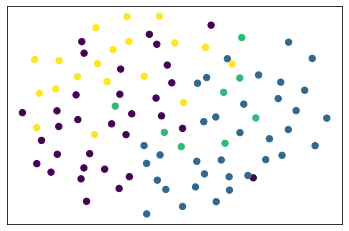

In [40]:
# draw the graph
pos = nx.spring_layout(G_scz)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition_scz.values()) + 1)
nx.draw_networkx_nodes(G_scz, pos, partition_scz.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition_scz.values()))


In [41]:
comm = pd.DataFrame([partition_hc,partition_scz]).T

In [66]:
comm0 = get_key(partition_hc,0)
comm1 = get_key(partition_hc,1)
comm2 = get_key(partition_hc,2)
comm3 = get_key(partition_hc,3)

In [48]:
[i+1 for i in comm0]

[1,
 2,
 7,
 8,
 9,
 10,
 13,
 14,
 15,
 16,
 33,
 34,
 61,
 62,
 67,
 68,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86]

In [50]:
pd.DataFrame([i+1 for i in comm0]).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,2,7,8,9,10,13,14,15,16,...,77,78,79,80,81,82,83,84,85,86


In [67]:
pd.DataFrame([i+1 for i in comm1]).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,3,4,5,6,19,20,35,36,37,38,39,40,65,66,69,70,71,72


In [51]:
a=[i+1 for i in comm0]
a

[1,
 2,
 7,
 8,
 9,
 10,
 13,
 14,
 15,
 16,
 33,
 34,
 61,
 62,
 67,
 68,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86]

In [53]:
for i in a:
    print(i,end=' ')

1 2 7 8 9 10 13 14 15 16 33 34 61 62 67 68 73 74 75 76 77 78 79 80 81 82 83 84 85 86 

HC组0号社团集中在中央前回、岛盖部&三角部额下回、中央沟盖、补充运动区、脑岛、中央后回、缘上回、中央旁小叶、尾状核、豆壳状核、丘脑、颞横回、颞上回

In [54]:
b = [i+1 for i in get_key(partition_scz,1)]

In [55]:
for i in b:
    print(i,end=' ')

3 4 5 6 11 12 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 35 36 39 40 65 66 69 70 89 90 91 92 93 

1号社团主要是额上回、额中回、眶部额下回、嗅皮质、眶额皮层、扣带回、角回、颞中回、颞下回

In [52]:
[i+1 for i in get_key(partition_scz,2)]

[41, 42, 43, 44, 45, 46, 87, 88]

2号社团主要是海马、海马旁回、杏仁核、颞极颞上回

In [54]:
[i+1 for i in get_key(partition_scz,3)]

[47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 64, 71, 72, 94]

3号社团主要是距状裂周围皮层、楔叶、楔前叶、舌回、枕回、梭状回、顶上回

In [43]:
comm[comm[0]!=comm[1]]

,0,1
10,2,1
11,2,1
16,2,1
17,2,1
20,2,1
21,2,1
22,2,1
23,2,1
24,2,1
25,2,1


In [46]:
#取特定值的key

def get_key (dict, value):
    return [k for k, v in dict.items() if v == value]


In [110]:
# 计算函数主体

def comm_dFC(data,window,partition,*,stride = 0,roi = 0):
    """
    ***********parameters*************
    data: timeseries of fMRI,each columns match a specific region
    
    window: window length
    stride: step of each move
    roi: number of region of interest,start from 1, if 0 is received, return all
    **********************************
    """
    
    
    if not stride: # stride为0 无重叠滑窗
        stride = window
        
    # 计算每个窗口下的FC矩阵
    i = 0
    fclist=[] # 每个窗口下的FC矩阵列表
    while (i+window) < len(data)-1:
        fc = np.corrcoef(data[i:i+window],rowvar=False)
        fclist.append(fc)
        i += stride
    
    # 计算动态变化性
    corlist=[] # 每个脑区的列表
    # 对每个脑区循环
    for k in range(0,data.shape[1]):
        corarray = [] #所有排列组合列表
        for i in range(1,len(fclist)):
            for j in range(0,i):
                cor = [] #每个社团的相关性
                for c in range(0,max(partition.values())+1):
                    c_idx = get_key(partition,c)
                    cor_c = pd.Series(fclist[i][k][c_idx]).corr(pd.Series(fclist[j][k][c_idx]))
                    # coarray--(1*(n(n-1)/2),n=window length)
                    cor.append(cor_c)
                corarray.append(cor)
        Vk = 1-np.mean(corarray,axis=0)
        corlist.append(Vk)
    
    if roi:
        return corlist[roi-1]
    else:
        return corlist

In [111]:
var_comm_scz=[]
for i in range(0,154):
    var_comm_scz.append(comm_dFC(pd.DataFrame(fmri[data[i][0]]).T,10,partition_scz))

In [112]:
var_comm_hc=[]
for i in range(154,266):
    var_comm_hc.append(comm_dFC(pd.DataFrame(fmri[data[i][0]]).T,10,partition_hc))

KeyboardInterrupt: 

In [123]:
mean(var_comm_scz,axis = 0)

array([[0.76643628, 0.87558456, 0.91655629, 0.885168  ],
       [0.73983689, 0.90316958, 0.9194678 , 0.895266  ],
       [0.88469266, 0.81600927, 0.90692488, 0.90427768],
       [0.88401197, 0.79500801, 0.91274242, 0.88607856],
       [0.8701723 , 0.77700292, 0.92580759, 0.90362599],
       [0.86361833, 0.74614996, 0.92127586, 0.89386922],
       [0.78071122, 0.82449986, 0.90205854, 0.90406247],
       [0.787514  , 0.81097084, 0.90791151, 0.89600939],
       [0.78097201, 0.80866925, 0.89104709, 0.91984392],
       [0.78177442, 0.82032989, 0.89431819, 0.920953  ],
       [0.86161191, 0.77260971, 0.84698991, 0.92533336],
       [0.85555557, 0.77919386, 0.8728206 , 0.92609827],
       [0.72143238, 0.89421788, 0.9053241 , 0.91044913],
       [0.72461646, 0.89183237, 0.90053739, 0.91231694],
       [0.79490239, 0.87146581, 0.8749306 , 0.91718806],
       [0.78759472, 0.87831814, 0.88944063, 0.91508138],
       [0.91867338, 0.78540263, 0.92225341, 0.93247412],
       [0.92125859, 0.78365087,

In [43]:
len(var_comm_scz)

154

In [ ]:
var_comm_scz[1]

In [ ]:
comm1_sz = [x[0] for x in var_comm_scz ]

In [87]:
a = [[1,2],[3,4],[5,6]]

In [55]:
a= [1,2,3,4,4,5]
b= [3,2,3,4,3,5]

In [89]:
mean(a,axis=0)

array([3., 4.])

In [2]:
scz_commvar = pd.read_csv('/Users/eugene_zh/学术/ITSBI/Code/1st year/ABCD/scz_comm_avgvar.csv',index_col=0)

In [62]:
scz_commvar

,0,1,2,3,4
0,0.766436,0.875585,0.916556,0.885168,0.843214
1,0.739837,0.903170,0.919468,0.895266,0.818442
2,0.884693,0.816009,0.906925,0.904278,0.840528
3,0.884012,0.795008,0.912742,0.886079,0.840448
4,0.870172,0.777003,0.925808,0.903626,0.834726
...,...,...,...,...,...
89,0.877481,0.815837,0.892895,0.877356,0.856469
90,0.899533,0.770139,0.843110,0.908314,0.790546
91,0.890040,0.769342,0.821624,0.905562,0.813297
92,0.906870,0.824982,0.927510,0.834904,0.867276


In [72]:
scz_commvar['4'] = sz_avg

In [73]:
scz_commvar.corr()

,0,1,2,3,4
0,1.000000,-0.400083,-0.191118,-0.361772,0.004714
1,-0.400083,1.000000,-0.067128,-0.451555,-0.112653
2,-0.191118,-0.067128,1.000000,-0.212215,-0.266035
3,-0.361772,-0.451555,-0.212215,1.000000,0.494520
4,0.004714,-0.112653,-0.266035,0.494520,1.000000


In [74]:
hc_commvar = pd.read_csv('/Users/eugene_zh/学术/ITSBI/Code/1st year/ABCD/hc_comm_avgvar.csv',index_col=0)

In [76]:
hc_commvar['4']=hc_avg

In [77]:
hc_commvar.corr()

,0,1,2,3,4
0,1.000000,-0.192842,-0.483400,-0.257731,0.163056
1,-0.192842,1.000000,-0.172410,-0.254505,-0.052846
2,-0.483400,-0.172410,1.000000,-0.367583,-0.335964
3,-0.257731,-0.254505,-0.367583,1.000000,0.545684
4,0.163056,-0.052846,-0.335964,0.545684,1.000000


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Schizophrenia Brain Community Variability')

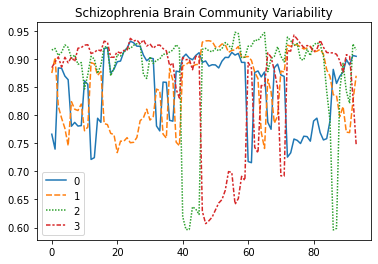

In [55]:
p = sns.lineplot(data = scz_commvar)
p.set_title("Schizophrenia Brain Community Variability")

Text(0.5, 1.0, 'Healthy Control Brain Community Variability')

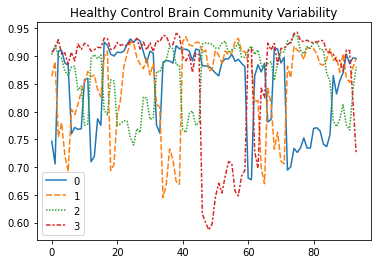

In [56]:
p = sns.lineplot(data = hc_commvar)
p.set_title("Healthy Control Brain Community Variability")

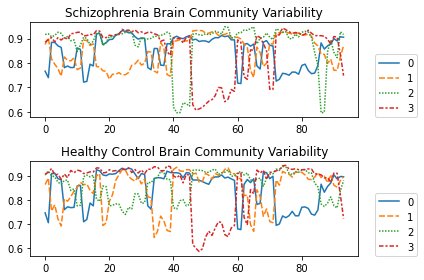

<Figure size 7200x7200 with 0 Axes>

In [34]:
fig, axes = plt.subplots(2, 1)
#fig.subplots_adjust(hspace=0)

sns.lineplot(data = scz_commvar, ax = axes[0])
sns.lineplot(data = hc_commvar, ax = axes[1])


plt.figure(figsize=(100,100))

axes[0].set_title("Schizophrenia Brain Community Variability")
axes[1].set_title("Healthy Control Brain Community Variability")

plt.suptitle("Comparison of Variability by Community")
axes[0].legend(bbox_to_anchor=(1.05,0), loc=3, borderaxespad=0)
axes[1].legend(bbox_to_anchor=(1.05,0), loc=3, borderaxespad=0)
fig.tight_layout()


In [ ]:
# 热力图 结果在一起


#搞定了。原来是使用pd.read_csv后在pivot得到的Dataframe会对index按照字母顺序排序。pivot后，用如下代码处理，就好了：

flights = pd.read_csv("flights.csv")
flights = flights.pivot("month", "year", "passengers")
newIndex  =  ['January','February','March','April','May','June','July','August','September','October','November','December']#手动指定索引
flights = flights.reindex(newIndex)
sns.heatmap(flights)

#不过不知道为啥使用load_dataset命令读入的数据就不会有问题
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
#这里pivot后，就不会对index按照字母排序


scz data 1 comm dFC

In [5]:
fmri[data[1][0]]

<HDF5 dataset "c": shape (94, 240), type "<f8">

In [7]:
# 全窗口计算静态FC矩阵
fcmlist=[]

df = pd.DataFrame(fmri[data[1][0]],).T
fcm = df.corr().values
fcmlist.append(fcm)

In [9]:
fcmlist

[array([[1.        , 0.35927253, 0.44229717, ..., 0.3404821 , 0.73483485,
         0.56834701],
        [0.35927253, 1.        , 0.08797555, ..., 0.36271757, 0.11463397,
         0.03436999],
        [0.44229717, 0.08797555, 1.        , ..., 0.49557642, 0.56705113,
         0.42694717],
        ...,
        [0.3404821 , 0.36271757, 0.49557642, ..., 1.        , 0.36413304,
         0.50435014],
        [0.73483485, 0.11463397, 0.56705113, ..., 0.36413304, 1.        ,
         0.79707081],
        [0.56834701, 0.03436999, 0.42694717, ..., 0.50435014, 0.79707081,
         1.        ]])]

In [ ]:
for i in range(1,len(fclist)):
            for j in range(0,i):
                cor = [] #每个社团的相关性
                for c in range(0,max(partition.values())+1):
                    c_idx = get_key(partition,c)
                    cor_c = pd.Series(fclist[i][k][c_idx]).corr(pd.Series(fclist[j][k][c_idx]))
                    # coarray--(1*(n(n-1)/2),n=window length)
                    cor.append(cor_c)
                corarray.apepend(cor)
        Vk = 1-np.mean(corarray,axis=0)
        corlist.append(Vk)

In [26]:
# 计算函数主体

def comm_dFC(data,window,partition,*,stride = 0,roi=0):
    
    """
    ***********parameters*************
    data: timeseries of fMRI,each columns match a specific region
    
    window: window length
    stride: step of each move
    roi: number of region of interest,start from 1, if 0 is received, return all
    **********************************
    """
    if not stride: # stride为0 无重叠滑窗
        stride = window

    # 计算每个窗口下的FC矩阵
    i = 0
    fclist=[] # 每个窗口下的FC矩阵列表
    while (i+window) < len(data)-1:
        fc = np.corrcoef(data[i:i+window],rowvar=False)
        fclist.append(fc)
        i += stride
    
    # 计算动态变化性
    corlist=[] # 每个脑区的列表
    # 对每个脑区循环
    for k in range(0,data.shape[1]):
        corarray = [] #所有排列组合列表
        for i in range(1,len(fclist)):
            for j in range(0,i):
                cor = [] #每个社团的相关性
                for c in range(0,len(par)):
                    c_idx = partition[c]
                    cor_c = pd.Series(fclist[i][k][c_idx]).corr(pd.Series(fclist[j][k][c_idx]))
                    # coarray--(1*(n(n-1)/2),n=window length)
                    cor.append(cor_c)
                corarray.append(cor)
        Vk = 1-np.mean(corarray,axis=0)
        corlist.append(Vk)

            
    if roi:
        return corlist[roi-1]
    else:
        return corlist

In [10]:
par=[[1,2,3,4,5],[6,7,8,9,10]]

In [14]:
len(par)

2

In [12]:
par[1]

[6, 7, 8, 9, 10]

In [13]:
par[0]

[1, 2, 3, 4, 5]

In [27]:
r = comm_dFC(pd.DataFrame(fmri[data[1][0]]).T,10,par)

In [30]:
rp = pd.DataFrame(r)

In [31]:
rp

,0,1
0,1.014117,0.728068
1,0.409723,0.923438
2,0.383254,0.956896
3,0.546971,0.792291
4,0.511538,0.936037
...,...,...
89,0.699246,0.997429
90,0.784465,0.691094
91,0.938196,0.977484
92,0.842518,1.005793


In [33]:
rs = h5py.File("/Users/eugene_zh/Documents/MATLAB/rs.mat",'r+')               
rs

OSError: Unable to open file (file signature not found)

In [36]:
import scipy.io 
rs = scipy.io.loadmat("/Users/eugene_zh/Documents/MATLAB/rs.mat")

In [40]:
rs = pd.DataFrame(rs['rs']).T

In [41]:
rs

,0,1
0,0.457600,0.904796
1,0.373643,0.860361
2,0.409824,0.688613
3,0.557239,0.618313
4,0.517231,0.645063
...,...,...
89,0.956564,0.894116
90,0.911784,0.856850
91,0.726410,0.830221
92,0.994747,0.956589


In [42]:
rp.apply(lambda s: rs.corrwith(s))

,0,1
0,0.630477,0.145900
1,0.452824,0.377018


In [43]:
rr = pd.concat([rs,rp],axis=1)

In [44]:
rr

,0,1,0,1
0,0.457600,0.904796,1.014117,0.728068
1,0.373643,0.860361,0.409723,0.923438
2,0.409824,0.688613,0.383254,0.956896
3,0.557239,0.618313,0.546971,0.792291
4,0.517231,0.645063,0.511538,0.936037
...,...,...,...,...
89,0.956564,0.894116,0.699246,0.997429
90,0.911784,0.856850,0.784465,0.691094
91,0.726410,0.830221,0.938196,0.977484
92,0.994747,0.956589,0.842518,1.005793


In [45]:
rr.corr()

,0,1,0,1
0,1.000000,0.745642,0.630477,0.145900
1,0.745642,1.000000,0.452824,0.377018
0,0.630477,0.452824,1.000000,0.001320
1,0.145900,0.377018,0.001320,1.000000
